In [127]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### Make Classification data and get it raedy

In [128]:
# Make 1000 samples
n_samples = 1000

# craete circles
x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


In [129]:
x.shape, y.shape

((1000, 2), (1000,))

In [130]:
print(f"First five samples of x:{x[:5]}")
print(f"First five samples of y:{y[:5]}")

First five samples of x:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:[1 1 1 1 0]


In [131]:
# Make Dataframe of circles data

circles = pd.DataFrame({'X1': x[:,0],
                        'x2': x[:,1], 'label': y})
circles.head()

,X1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


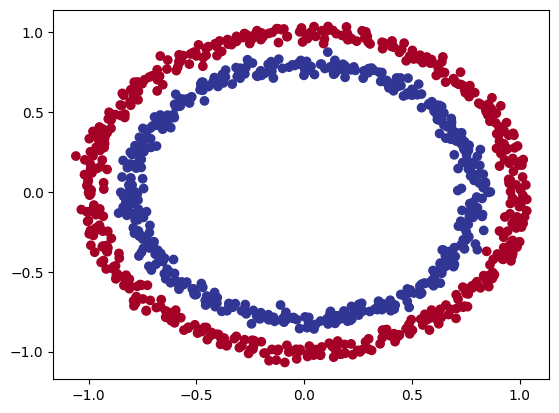

In [132]:
plt.scatter(x=x[:,0], y= x[:,1], c=y, cmap= plt.cm.RdYlBu)
plt.show()

### Turning out data into tensors and making a training and testing split

In [133]:
# checking the shapes of x and y

x.shape, y.shape
x_samp = x[0]
y_samp = y[0]

print(f'Values for one sample of X:{x_samp} -- Values for one sample of Y:{y_samp}')
print(f'Shape for one sample of X:{x_samp.shape} -- Shape for one sample of Y:{y_samp.shape}')

Values for one sample of X:[0.75424625 0.23148074] -- Values for one sample of Y:1
Shape for one sample of X:(2,) -- Shape for one sample of Y:()


In [134]:
# Turning the data into tensors

X = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [135]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [136]:
# split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [137]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

### Setting up a device agnostic code

In [138]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Constructing a model and inherting from the subclass **nn.Module**

In [139]:
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer1 = nn.Linear(in_features=2, out_features=5)
    self.linear_layer2 = nn.Linear(in_features=5, out_features=1)

    # self.two_leyers = nn.Sequential(
    # nn.Linear(in_features=2, out_features=5),
    # nn.Linear(in_features=5, out_features=1)
    # )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer2(self.linear_layer1(x))
    # return self.two_layers


In [140]:
circle_model = circleModelV0().to(device)
next(circle_model.parameters()).device

device(type='cuda', index=0)

In [141]:
circle_model, circle_model.state_dict()

(circleModelV0(
   (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
   (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]], device='cuda:0')),
              ('linear_layer1.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
              ('linear_layer2.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
              ('linear_layer2.bias', tensor([-0.2060], device='cuda:0'))]))

### Recreating the model using **nn.Sequential()**

In [142]:
circle_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

circle_model, circle_model.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[-0.0829, -0.2872],
                       [ 0.4691, -0.5582],
                       [-0.3260, -0.1997],
                       [-0.4252,  0.0667],
                       [-0.6984,  0.6386]], device='cuda:0')),
              ('0.bias',
               tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
              ('1.weight',
               tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
              ('1.bias', tensor([-0.1213], device='cuda:0'))]))

In [143]:
# Make some predictions
circle_model.eval()
with torch.inference_mode():
  untrained_preds = circle_model(X_test.to(device))
print(f'Length of predictions:{len(untrained_preds)}, Shape:{untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape:{X_test.shape}')
print(f'\nFirst 10 predictions:{torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 labels:{y_test[:10]}')

Length of predictions:200, Shape:torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions:tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setting up a Loss-Function and Optimizer  

In [144]:
loss_fn = nn.BCEWithLogitsLoss() # -> requires raw inputs as logits
# loss_fn = nn.BCELoss() -> requires prediction probabilities as inputs
optimizer = torch.optim.Adam(params=circle_model.parameters(),
                             lr = 0.01)

### Evaluation Metrics

In [145]:
def accuracy_score(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### Raw Outputs are logits

In [146]:
circle_model.eval()
with torch.inference_mode():
  y_logits = circle_model(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

### Convert the logits into probabilities by applied Sigmoid function on logits

In [147]:
prob_preds = torch.sigmoid(y_logits)
prob_preds

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

### Rounding the probabilities predictions to get the labels

In [148]:
torch.round(prob_preds)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [149]:
torch.cuda.manual_seed(42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
epochs = 1000

for epoch in range(epochs):
  epoch_counter = []
  train_loss_list = []
  test_loss_list =[]

  circle_model.train()
  y_logits = circle_model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  train_loss = loss_fn(y_logits, y_train)
  train_acc = accuracy_score(y_train, y_preds)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()


  circle_model.eval()
  with torch.inference_mode():
    test_logits = circle_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_score(y_test, test_pred)


  if epoch % 50 == 0:
    epoch_counter.append(epoch)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)

    print(f"Epoch:{epoch} | Train-Loss:{train_loss:.5f} | Train_Acc:{train_acc:.2f} | Test-Loss:{test_loss:.5f} | Test_Acc:{test_acc:.2f}")
    print(circle_model.state_dict(),'\n')

Epoch:0 | Train-Loss:0.69796 | Train_Acc:51.88 | Test-Loss:0.69363 | Test_Acc:56.50
OrderedDict([('0.weight', tensor([[-0.0929, -0.2772],
        [ 0.4591, -0.5482],
        [-0.3360, -0.1897],
        [-0.4152,  0.0567],
        [-0.7084,  0.6486]], device='cuda:0')), ('0.bias', tensor([-0.6107,  0.5359,  0.1077, -0.2196,  0.4270], device='cuda:0')), ('1.weight', tensor([[ 0.0797,  0.3513,  0.0389, -0.1310,  0.1302]], device='cuda:0')), ('1.bias', tensor([-0.1313], device='cuda:0'))]) 

Epoch:50 | Train-Loss:0.69299 | Train_Acc:50.38 | Test-Loss:0.69441 | Test_Acc:45.50
OrderedDict([('0.weight', tensor([[-0.0872, -0.1425],
        [ 0.4280, -0.4292],
        [-0.4394,  0.0305],
        [-0.3590, -0.0567],
        [-0.6999,  0.7440]], device='cuda:0')), ('0.bias', tensor([-0.6340,  0.4780,  0.0067, -0.1488,  0.3941], device='cuda:0')), ('1.weight', tensor([[ 0.0771,  0.2692, -0.1126, -0.0683,  0.2252]], device='cuda:0')), ('1.bias', tensor([-0.1815], device='cuda:0'))]) 

Epoch:100 | T

### Make Predicitions and Evaluate the Model

In [150]:
import requests
from pathlib import Path

In [151]:
if Path('helper_finction.py').is_file():
  print('helper_function.py already exists, skipping download')
else:
  print('Downloading helper_function.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_function.py', 'wb') as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

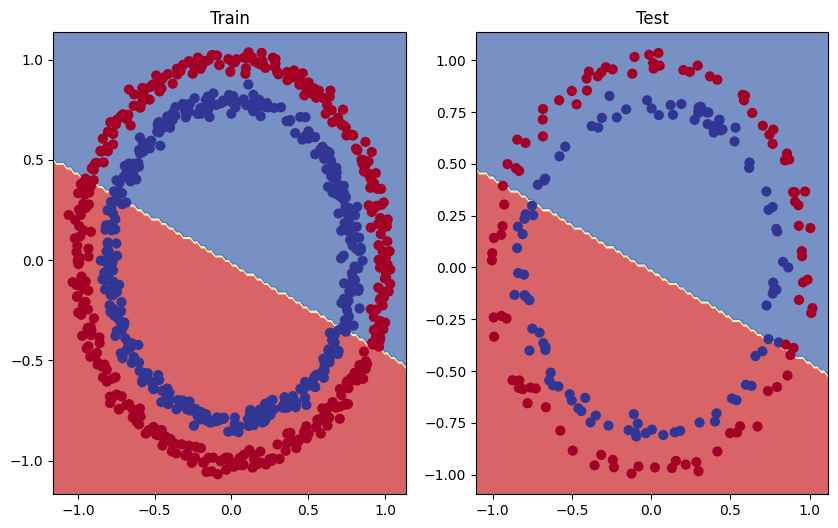

In [152]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(circle_model, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(circle_model, X_test, y_test)
plt.show()

### Improving a model (from model's prespective)

* Add some more layers - give model chance to learn patterns in data
* Add more hidden units
* Fit for longer
* Changing the activation functions or adding within models
* Change the learning rate
* Change the loss function

In [153]:
class circleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    z = self.layer1(x)
    z = self.layer2(z)
    z = self.layer3(z)
    return z

model_1 = circleModelV1().to(device)
model_1


circleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [154]:
loss_1 = nn.BCEWithLogitsLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(),
                               lr = 0.01)

In [155]:
torch.cuda.manual_seed(32)
torch.manual_seed(32)
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)
epochs = 1000

for epoch in range(epochs):
  epoch_counter = []
  train_loss_list = []
  test_loss_list =[]

  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  train_loss = loss_1(y_logits, y_train)
  train_acc = accuracy_score(y_train, y_preds)
  optimizer_1.zero_grad()
  train_loss.backward()
  optimizer_1.step()


  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_1(test_logits, y_test)
    test_acc = accuracy_score(y_test, test_pred)


  if epoch % 50 == 0:
    epoch_counter.append(epoch)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)

    print(f"Epoch:{epoch} | Train-Loss:{train_loss:.5f} | Train_Acc:{train_acc:.2f} | Test-Loss:{test_loss:.5f} | Test_Acc:{test_acc:.2f}")
    # print(model_1.state_dict(),'\n')

Epoch:0 | Train-Loss:0.69713 | Train_Acc:50.00 | Test-Loss:0.69619 | Test_Acc:50.00
Epoch:50 | Train-Loss:0.69577 | Train_Acc:50.00 | Test-Loss:0.69505 | Test_Acc:50.00
Epoch:100 | Train-Loss:0.69493 | Train_Acc:50.00 | Test-Loss:0.69436 | Test_Acc:50.00
Epoch:150 | Train-Loss:0.69440 | Train_Acc:55.50 | Test-Loss:0.69395 | Test_Acc:54.00
Epoch:200 | Train-Loss:0.69407 | Train_Acc:55.62 | Test-Loss:0.69371 | Test_Acc:55.00
Epoch:250 | Train-Loss:0.69386 | Train_Acc:53.25 | Test-Loss:0.69356 | Test_Acc:54.00
Epoch:300 | Train-Loss:0.69372 | Train_Acc:51.50 | Test-Loss:0.69347 | Test_Acc:55.50
Epoch:350 | Train-Loss:0.69362 | Train_Acc:50.50 | Test-Loss:0.69342 | Test_Acc:55.00
Epoch:400 | Train-Loss:0.69356 | Train_Acc:49.75 | Test-Loss:0.69339 | Test_Acc:55.00
Epoch:450 | Train-Loss:0.69351 | Train_Acc:50.25 | Test-Loss:0.69336 | Test_Acc:55.50
Epoch:500 | Train-Loss:0.69347 | Train_Acc:50.00 | Test-Loss:0.69335 | Test_Acc:54.50
Epoch:550 | Train-Loss:0.69344 | Train_Acc:49.62 | Test-L

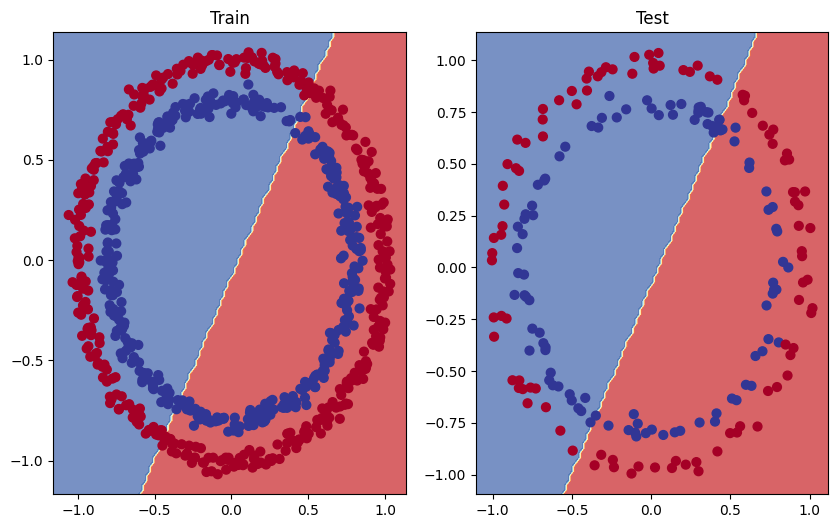

In [156]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)
plt.show()

### Preparing data to see if our model can fit a straight line

In [157]:
# create some data (same as notebook 1)

weight = 0.7
bias = 0.3
x_reg = torch.arange(0,1,0.01).unsqueeze(dim=1)
y_reg = weight*x_reg + bias

print(len(x_reg))
x_reg[0:5], y_reg[0:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [158]:
# Create train and test splits

train_split = int(0.8* len(x_reg))

x_train_reg, y_train_reg = x_reg[:train_split], y_reg[:train_split]
x_test_reg, y_test_reg = x_reg[train_split:], y_reg[train_split:]

x_train_reg.shape, y_train_reg.shape, x_test_reg.shape, y_test_reg.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

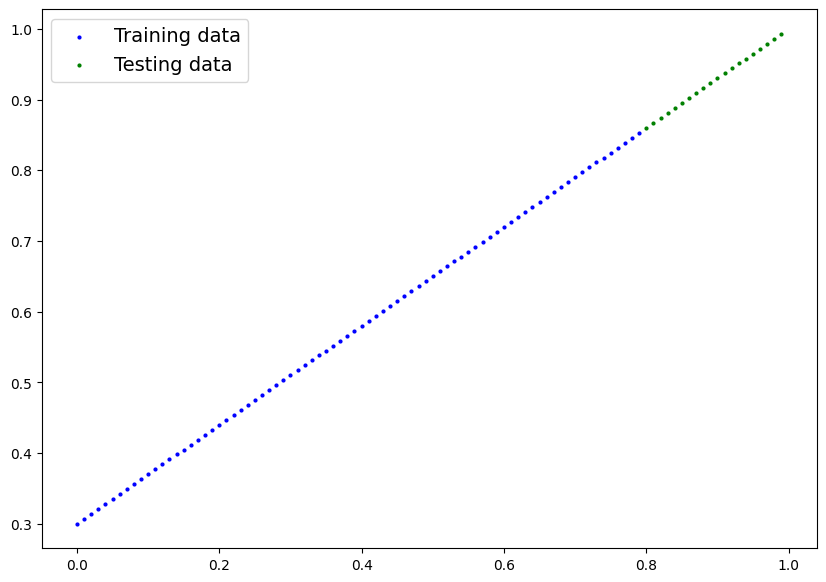

In [159]:
plot_predictions(x_train_reg, y_train_reg,
                 x_test_reg, y_test_reg)

In [160]:
model_1

circleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [161]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [162]:
loss_2 = nn.L1Loss()
optim_2 = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [163]:
torch.cuda.manual_seed(32)
torch.manual_seed(32)
# x_train_reg, y_train_reg = x_train_reg.to(device), y_train_reg.to(device)
# x_test_reg, y_test_reg = x_test_reg.to(device), y_test_reg.to(device)
epochs = 1000

for epoch in range(epochs):
  epoch_counter = []
  train_loss_list = []
  test_loss_list =[]

  model_2.train()
  y_pred = model_2(x_train_reg).squeeze()
  train_loss = loss_2(y_pred, y_train_reg)
  optim_2.zero_grad()
  train_loss.backward()
  optim_2.step()


  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_reg).squeeze()
    test_loss = loss_2(test_pred, y_test_reg)

  if epoch % 50 == 0:
    epoch_counter.append(epoch)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)

    print(f"Epoch:{epoch} | Train-Loss:{train_loss:.5f} | Test-Loss:{test_loss:.5f}")
    # print(model_2.state_dict(),'\n')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch:0 | Train-Loss:0.85362 | Test-Loss:1.24503
Epoch:50 | Train-Loss:0.14005 | Test-Loss:0.33839
Epoch:100 | Train-Loss:0.14004 | Test-Loss:0.33987
Epoch:150 | Train-Loss:0.14002 | Test-Loss:0.34125
Epoch:200 | Train-Loss:0.14001 | Test-Loss:0.34250
Epoch:250 | Train-Loss:0.14001 | Test-Loss:0.34358
Epoch:300 | Train-Loss:0.14000 | Test-Loss:0.34443
Epoch:350 | Train-Loss:0.14000 | Test-Loss:0.34500
Epoch:400 | Train-Loss:0.14000 | Test-Loss:0.34532
Epoch:450 | Train-Loss:0.14000 | Test-Loss:0.34549
Epoch:500 | Train-Loss:0.14000 | Test-Loss:0.34557
Epoch:550 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:600 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:650 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:700 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:750 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:800 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:850 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:900 | Train-Loss:0.14000 | Test-Loss:0.34558
Epoch:950 | Train-Loss:0.14000 | T

In [164]:
model_2.eval()
with torch.inference_mode():
  testing_pred = model_2(x_test_reg)
testing_pred[:10]

tensor([[0.5801],
        [0.5802],
        [0.5803],
        [0.5803],
        [0.5804],
        [0.5805],
        [0.5806],
        [0.5807],
        [0.5808],
        [0.5809]])

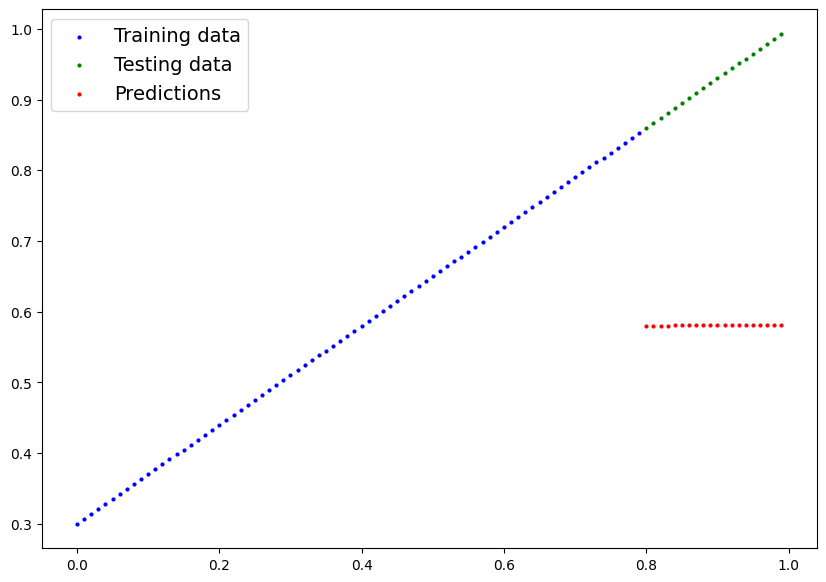

In [165]:
plot_predictions(x_train_reg.cpu(), y_train_reg.cpu(),
                 x_test_reg.cpu(), y_test_reg.cpu(),
                 predictions=testing_pred.cpu())

### The missing piece : Non-Linearity

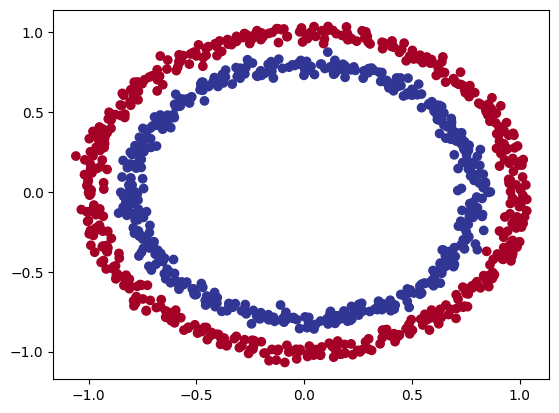

In [166]:
# Recreating non-linear data (red and blue circles)

x,y = make_circles(n_samples=1000, noise=0.03, random_state=42)

plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()




In [167]:
# convert data to tensors and then train and test

X = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,
                                                 random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

### Building a model with non-linearity

In [168]:
class circleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # self.layer_1 = nn.Linear(in_features=2, out_features=10)
    # self.layer_2 = nn.Linear(in_features=10, out_features=10)
    # self.layer_3 = nn.Linear(in_features=10, out_features=1)
    # self.relu = nn.ReLU()
    self.layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=20),
        nn.ReLU(),
        nn.Linear(in_features=20, out_features=1),

    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layers(x)
    # return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [169]:
model_3 = circleModelV2().to(device)
next(model_3.parameters()).device

device(type='cuda', index=0)

In [170]:
loss_3 = nn.BCEWithLogitsLoss()
optim_3 = torch.optim.SGD(params = model_3.parameters(),
                          lr = 1)

In [171]:
# Model training and testing using non-linearity

epochCounts = []
trainLossCount = []
testLossCount = []

torch.cuda.manual_seed(32)
torch.manual_seed(32)
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
epochs = 1000

for epoch in range(epochs):
  model_3.train()
  y_logs = model_3(x_train).squeeze()
  train_loss = loss_3(y_logs, y_train)
  y_pred = torch.round(torch.sigmoid(y_logs))
  train_acc = accuracy_score(y_train,y_pred)
  optim_3.zero_grad()
  train_loss.backward()
  optim_3.step()


  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_loss = loss_3(test_logits, y_test)
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_acc = accuracy_score(y_test, test_pred)

  if epoch % 50 == 0:
    epochCounts.append(epoch)
    trainLossCount.append(train_loss)
    testLossCount.append(test_loss)
    print(f"Epoch:{epoch} | Train-Loss:{train_loss:.5f} | Train_Acc:{train_acc:.2f} | Test-Loss:{test_loss:.5f} | Test_Acc:{test_acc:.2f}")
    # print(model_3.state_dict(),'\n')

Epoch:0 | Train-Loss:0.70158 | Train_Acc:50.00 | Test-Loss:0.69793 | Test_Acc:50.00
Epoch:50 | Train-Loss:0.67903 | Train_Acc:60.50 | Test-Loss:0.68225 | Test_Acc:58.00
Epoch:100 | Train-Loss:0.54783 | Train_Acc:77.50 | Test-Loss:0.64158 | Test_Acc:52.00
Epoch:150 | Train-Loss:1.24678 | Train_Acc:50.00 | Test-Loss:0.73486 | Test_Acc:50.00
Epoch:200 | Train-Loss:0.37211 | Train_Acc:91.50 | Test-Loss:0.49523 | Test_Acc:69.00
Epoch:250 | Train-Loss:0.37764 | Train_Acc:96.00 | Test-Loss:0.37499 | Test_Acc:98.50
Epoch:300 | Train-Loss:0.10296 | Train_Acc:100.00 | Test-Loss:0.12163 | Test_Acc:99.00
Epoch:350 | Train-Loss:0.04304 | Train_Acc:100.00 | Test-Loss:0.06133 | Test_Acc:99.50
Epoch:400 | Train-Loss:0.01973 | Train_Acc:100.00 | Test-Loss:0.03405 | Test_Acc:99.50
Epoch:450 | Train-Loss:0.01282 | Train_Acc:100.00 | Test-Loss:0.02569 | Test_Acc:99.50
Epoch:500 | Train-Loss:0.00944 | Train_Acc:100.00 | Test-Loss:0.02095 | Test_Acc:100.00
Epoch:550 | Train-Loss:0.00739 | Train_Acc:100.00 |

In [172]:
# Make PRedictions with non linear function

with torch.inference_mode():
  inferences = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
inferences[:10], y[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

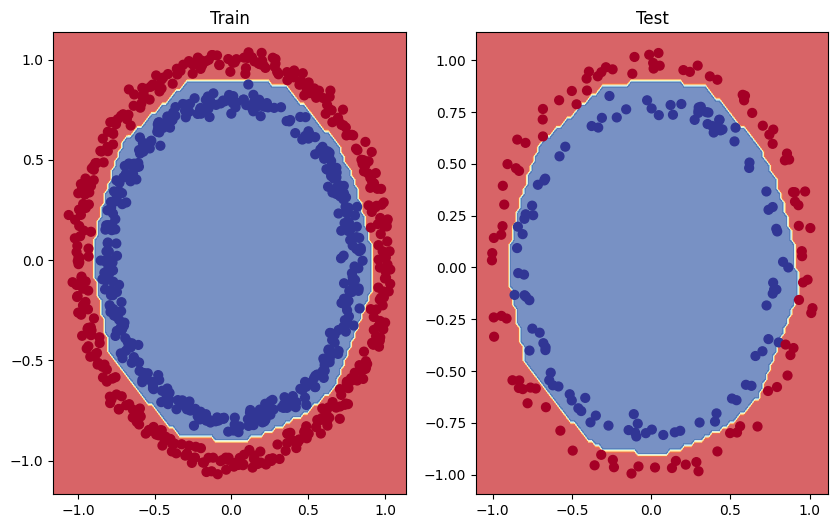

In [173]:
# plot the trained model

plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, x_test, y_test)
plt.show()

In [174]:
trainLossCount = torch.tensor(trainLossCount).numpy()
testLossCount = torch.tensor(testLossCount).numpy()

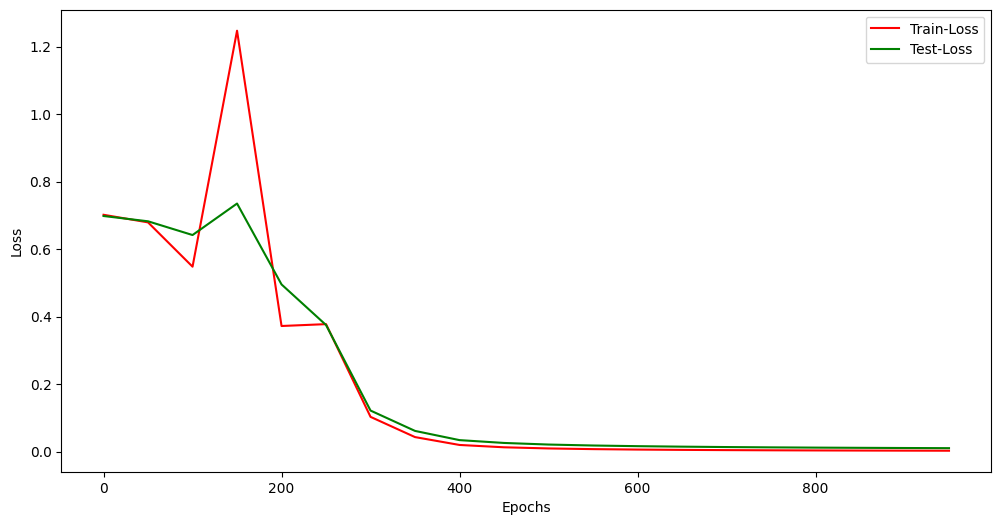

In [175]:
plt.figure(figsize=[12,6])
plt.plot(epochCounts, trainLossCount, c='r', label='Train-Loss')
plt.plot(epochCounts, testLossCount, c='g', label='Test-Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Replicating Non-Linear activation functions

In [176]:
A = torch.arange(-10,10,1).type(torch.float)

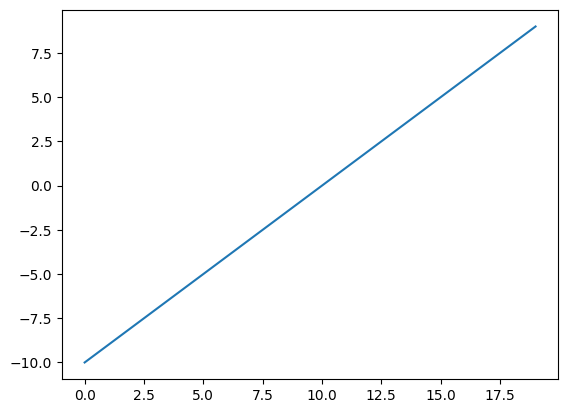

In [177]:
plt.plot(A)
plt.show()

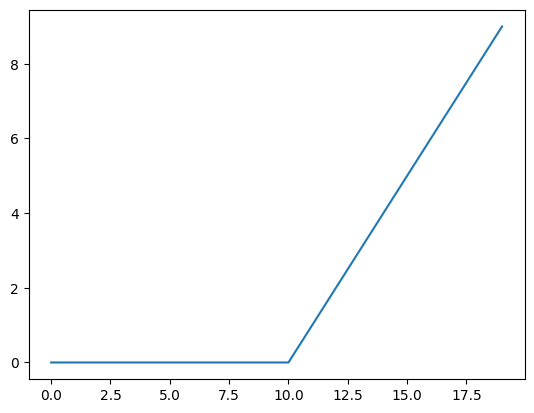

In [178]:
plt.plot(torch.relu(A))
plt.show()

In [179]:
def relu(x: torch.Tensor)-> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

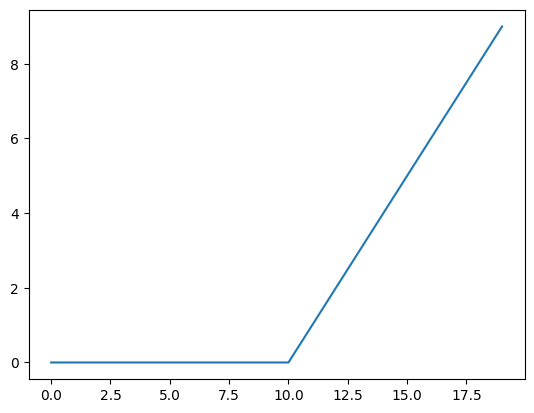

In [180]:
plt.plot(relu(A))

In [181]:
def sigmoid(x: torch.Tensor)-> torch.Tensor():
  return 1/(1 + torch.exp(-x))

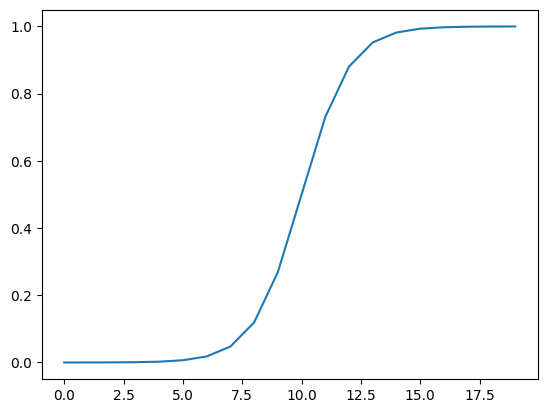

In [182]:
plt.plot(sigmoid(A))
plt.show()

### Multiclass Classification Problem

In [183]:
# Creating a toy multiclass dataset

import torch
import matplotlib.pyplot as pyplot
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [184]:
num_classes = 4
num_features = 2
random_seed = 42

# create multiclass data

x_blob, y_blob = make_blobs(n_samples =1000, n_features = num_features,
                            centers = num_classes, random_state = random_seed,
                            cluster_std =1.5)

# turn data into tensors

X_blob = torch.from_numpy(x_blob).type(torch.float)
Y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# splitting into train and test

x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(
                                                                      X_blob,
                                                                      Y_blob,
                                                                      test_size = 0.2,
                                                                      random_state=42
)


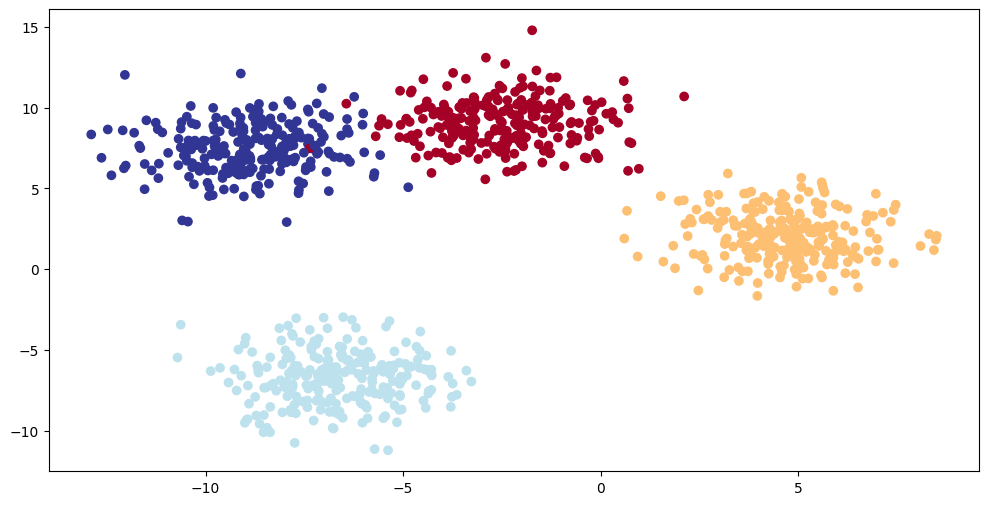

In [185]:
# plot the data

plt.figure(figsize=[12,6])
plt.scatter(x_blob[:,0], x_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)
plt.show()

### Building a multilclass classsification model in Pytorch

In [186]:
# create device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [187]:
# Building a multiclass classification model

class blobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)

    )
  def forward(self, x : torch.Tensor)-> torch.Tensor:
    return self.layer_stack(x)

In [188]:
x_blob_train.shape, y_blob_train.shape, x_blob_test.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [189]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [190]:
model_4 = blobModel(input_features=2, output_features = 4,
                    hidden_units=8).to(device)

x_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

model_4

blobModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [191]:
# crating a loss function and setting up the optimizer

loss_4 = nn.CrossEntropyLoss()
optim_4 = torch.optim.SGD(params = model_4.parameters(),
                          lr= 0.1)

In [192]:
# creating the raw logits from our model

model_4.eval()
with torch.inference_mode():
  raw_preds = model_4(x_blob_test)
raw_preds[:10]

tensor([[-0.1936,  0.2814,  0.0360,  0.3421],
        [ 0.5194, -0.0010, -0.3173, -0.4008],
        [-0.1455, -0.2471,  0.7386, -0.4586],
        [-0.2199,  0.3505,  0.1348,  0.3654],
        [ 0.0727,  0.2734,  0.0777,  0.1747],
        [ 0.6127, -0.0673, -0.4162, -0.5216],
        [-0.3803, -0.2742,  0.8967, -0.4953],
        [ 0.1341,  0.2949,  0.0185,  0.1446],
        [ 0.0321, -0.4034,  0.5839, -0.5563],
        [ 0.1068,  0.2731,  0.0472,  0.1600]], device='cuda:0')

In [193]:
# converting the raw logits into prediction probabilities

pred_probs = torch.softmax(raw_preds, dim=1)
print(f"Raw Logits:\n{raw_preds[:5]}")
print(f"Prediction Probabilities:\n{pred_probs[:5]}")

Raw Logits:
tensor([[-0.1936,  0.2814,  0.0360,  0.3421],
        [ 0.5194, -0.0010, -0.3173, -0.4008],
        [-0.1455, -0.2471,  0.7386, -0.4586],
        [-0.2199,  0.3505,  0.1348,  0.3654],
        [ 0.0727,  0.2734,  0.0777,  0.1747]], device='cuda:0')
Prediction Probabilities:
tensor([[0.1794, 0.2884, 0.2257, 0.3065],
        [0.4122, 0.2450, 0.1785, 0.1642],
        [0.1978, 0.1787, 0.4789, 0.1446],
        [0.1669, 0.2953, 0.2380, 0.2997],
        [0.2307, 0.2820, 0.2319, 0.2555]], device='cuda:0')


In [194]:
# converting the model's prediction probabilities to prediction labels

y_labels = torch.argmax(pred_probs, dim=1)
y_labels, y_blob_test

(tensor([3, 0, 2, 3, 1, 0, 2, 1, 2, 1, 0, 3, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2,
         2, 0, 0, 1, 3, 0, 0, 3, 3, 0, 3, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 3, 1,
         1, 0, 3, 0, 1, 2, 0, 2, 3, 3, 0, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0,
         0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0,
         3, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 3, 3, 1, 2, 2, 0, 1, 1, 3, 0,
         2, 0, 1, 3, 2, 1, 1, 1, 2, 0, 3, 2, 0, 2, 0, 0, 1, 1, 3, 3, 3, 1, 2, 2,
         2, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 0, 0, 2, 3, 2, 1, 0, 2, 1, 0, 2, 0,
         2, 2, 2, 1, 0, 3, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 2, 2, 0, 3, 2, 2, 0, 0,
         3, 0, 2, 1, 0, 3, 2, 3], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 

In [195]:
# training and testing the model

epochs = 1000

eps = []
tr_loss = []
tst_loss = []

for epoch in range(epochs):
  # training
  model_4.train()
  y_logits = model_4(x_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  train_loss = loss_4(y_logits, y_blob_train)
  train_acc = accuracy_score(y_blob_train, y_pred)
  optim_4.zero_grad()
  train_loss.backward()
  optim_4.step()


  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(x_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_4(test_logits, y_blob_test)
    train_acc = accuracy_score(y_blob_test, test_pred)

  if epoch % 50 == 0:
    print(f"Epoch:{epoch} | Train-Loss:{train_loss:.4f}, Train-acc:{train_acc:.2f} | Test-Loss:{test_loss:.4f} | Test-acc:{test_acc:.2f}")


Epoch:0 | Train-Loss:1.3138, Train-acc:35.00 | Test-Loss:1.2434 | Test-acc:100.00
Epoch:50 | Train-Loss:0.1195, Train-acc:99.50 | Test-Loss:0.1135 | Test-acc:100.00
Epoch:100 | Train-Loss:0.0431, Train-acc:99.50 | Test-Loss:0.0361 | Test-acc:100.00
Epoch:150 | Train-Loss:0.0335, Train-acc:99.50 | Test-Loss:0.0253 | Test-acc:100.00
Epoch:200 | Train-Loss:0.0302, Train-acc:99.50 | Test-Loss:0.0213 | Test-acc:100.00
Epoch:250 | Train-Loss:0.0287, Train-acc:99.50 | Test-Loss:0.0193 | Test-acc:100.00
Epoch:300 | Train-Loss:0.0278, Train-acc:99.50 | Test-Loss:0.0180 | Test-acc:100.00
Epoch:350 | Train-Loss:0.0272, Train-acc:99.50 | Test-Loss:0.0172 | Test-acc:100.00
Epoch:400 | Train-Loss:0.0268, Train-acc:99.50 | Test-Loss:0.0165 | Test-acc:100.00
Epoch:450 | Train-Loss:0.0264, Train-acc:99.50 | Test-Loss:0.0161 | Test-acc:100.00
Epoch:500 | Train-Loss:0.0261, Train-acc:99.50 | Test-Loss:0.0157 | Test-acc:100.00
Epoch:550 | Train-Loss:0.0259, Train-acc:99.50 | Test-Loss:0.0154 | Test-acc:10

### Making and evaluating predictions with pytorch for multiclass model

In [196]:
# make predictions

model_4.eval()
with torch.inference_mode():
  logits = model_4(x_blob_test)

In [197]:
# prediction probabilities

y_pred_probs = torch.softmax(logits, dim=1)
y_pred_probs[:10]

tensor([[5.7335e-06, 9.9999e-01, 1.0163e-06, 5.2854e-06],
        [2.8176e-04, 1.6501e-07, 1.3708e-04, 9.9958e-01],
        [1.7968e-14, 1.9263e-09, 9.9999e-01, 1.0209e-05],
        [4.6085e-06, 9.9995e-01, 1.6707e-05, 2.5787e-05],
        [9.9991e-01, 1.8758e-05, 3.1204e-07, 6.7997e-05],
        [1.7780e-05, 4.6791e-09, 2.8503e-05, 9.9995e-01],
        [1.5790e-12, 4.2275e-08, 9.9995e-01, 5.2290e-05],
        [9.9970e-01, 2.2164e-06, 1.2231e-07, 3.0004e-04],
        [6.7011e-18, 7.2895e-12, 1.0000e+00, 1.8133e-06],
        [9.9982e-01, 3.7426e-06, 2.0240e-07, 1.7727e-04]], device='cuda:0')

In [198]:
y_pred_labels = torch.argmax(y_pred_probs, dim=1)
y_pred_labels

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

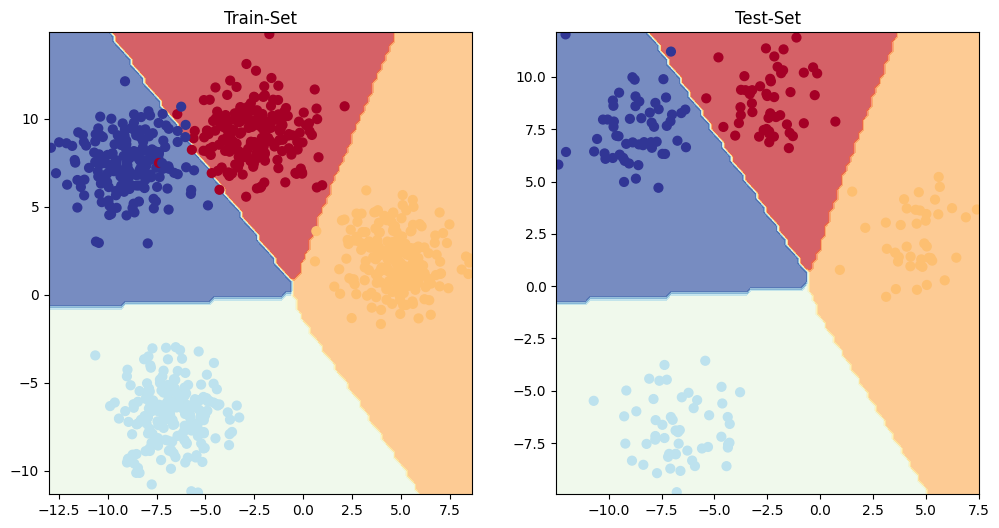

In [199]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.title('Train-Set')
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title('Test-Set')
plot_decision_boundary(model_4, x_blob_test, y_blob_test)
plt.show()


### The above model can also be trained using linear model and it will give the same result but the separataion lines will be more straighter.


### A few more classification metrics (Evaluating)

* Accuracy - out of 100 samples how many does our model get right ?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report


### Exercises

In [200]:
# Exercise 1

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_moon, y_moon = make_moons(n_samples = 1000, noise = 0.03,
                            random_state=42)

X_moon = torch.from_numpy(x_moon).type(torch.float)
y_moon = torch.from_numpy(y_moon).type(torch.float)

In [201]:
x_moon_train, x_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moon, y_moon, test_size = 0.2, random_state = 42
)

In [202]:
df = pd.DataFrame({'x0':x_moon[:,0], 'x1':x_moon[:,1], 'labels':y_moon})
df.head()

,x0,x1,labels
0,-0.009332,0.390981,1.0
1,0.954574,-0.473756,1.0
2,0.918526,-0.425196,1.0
3,0.412768,-0.376385,1.0
4,-0.845320,0.528799,0.0


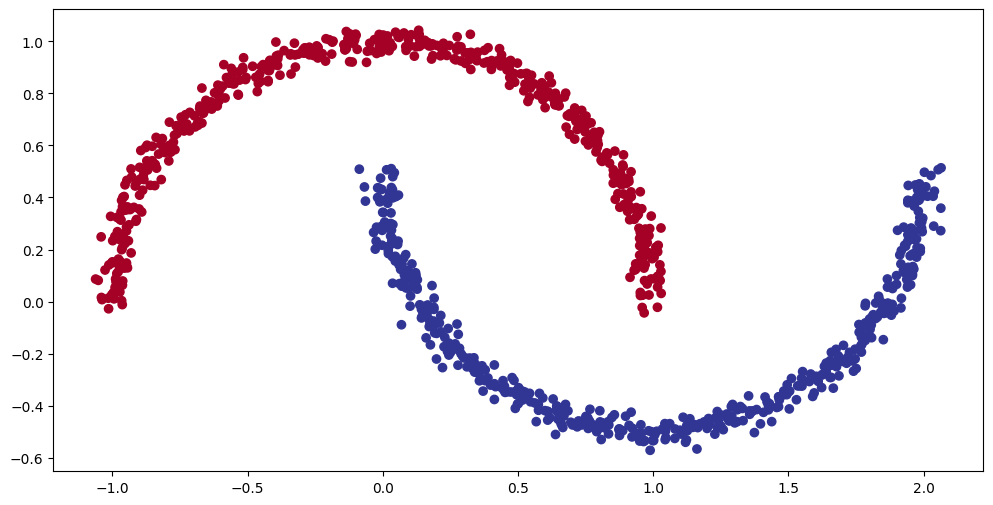

In [203]:
plt.figure(figsize=[12,6])
plt.scatter(x_moon[:,0],x_moon[:,1], c=y_moon, cmap= plt.cm.RdYlBu)
plt.show()

In [204]:
x_moon_train.shape, x_moon_test.shape, y_moon_train.shape, y_moon_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [205]:
# Exercise 2

class moonModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layer_stack(x)

model = moonModelV0(input_features=2, output_features=1, hidden_units=8).to(device)
model


moonModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [206]:
x_moon_train = x_moon_train.to(device)
x_moon_test = x_moon_test.to(device)
y_moon_train = y_moon_train.to(device)
y_moon_test = y_moon_test.to(device)

In [207]:
model.eval()
with torch.inference_mode():
  raw_logits = model(x_moon_test)
raw_logits[:10]

tensor([[-0.2371],
        [-0.1973],
        [-0.2202],
        [-0.2047],
        [-0.2023],
        [-0.1980],
        [-0.2008],
        [-0.2078],
        [-0.2252],
        [-0.2004]], device='cuda:0')

In [208]:
pred_probs = torch.sigmoid(raw_logits)
pred_probs[:10]

tensor([[0.4410],
        [0.4508],
        [0.4452],
        [0.4490],
        [0.4496],
        [0.4507],
        [0.4500],
        [0.4482],
        [0.4439],
        [0.4501]], device='cuda:0')

In [209]:
# Exercise 3

loss_fn = nn.BCEWithLogitsLoss()
optim_fn = torch.optim.SGD(params = model.parameters(),
                           lr = 0.1)

In [210]:
# Exercise 4
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  # training
  model.train()
  y_logits = model(x_moon_train).squeeze()
  trainLoss = loss_fn(y_logits, y_moon_train)
  y_preds = torch.round(torch.sigmoid(y_logits))
  trainAcc = accuracy_score(y_moon_train, y_preds)
  optim_fn.zero_grad()
  trainLoss.backward()
  optim_fn.step()


  # testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(x_moon_test).squeeze()
    testLoss = loss_fn(test_logits, y_moon_test)
    testPreds = torch.round(torch.sigmoid(test_logits))
    testAcc = accuracy_score(y_moon_test, testPreds)


  if epoch % 10 ==0:
    print(f"Epoch:{epoch} | Train-Loss:{trainLoss:.4f}, Train-acc:{trainAcc:.2f} | Test-Loss:{testLoss:.4f} | Test-acc:{testAcc:.2f}")


Epoch:0 | Train-Loss:0.6889, Train-acc:50.00 | Test-Loss:0.6900 | Test-acc:50.00
Epoch:10 | Train-Loss:0.6774, Train-acc:50.00 | Test-Loss:0.6795 | Test-acc:50.00
Epoch:20 | Train-Loss:0.6663, Train-acc:54.12 | Test-Loss:0.6692 | Test-acc:58.00
Epoch:30 | Train-Loss:0.6531, Train-acc:65.88 | Test-Loss:0.6568 | Test-acc:63.50
Epoch:40 | Train-Loss:0.6361, Train-acc:77.88 | Test-Loss:0.6409 | Test-acc:75.50
Epoch:50 | Train-Loss:0.6141, Train-acc:78.88 | Test-Loss:0.6202 | Test-acc:78.00
Epoch:60 | Train-Loss:0.5858, Train-acc:79.50 | Test-Loss:0.5938 | Test-acc:78.00
Epoch:70 | Train-Loss:0.5515, Train-acc:80.50 | Test-Loss:0.5619 | Test-acc:79.50
Epoch:80 | Train-Loss:0.5116, Train-acc:81.25 | Test-Loss:0.5248 | Test-acc:80.50
Epoch:90 | Train-Loss:0.4688, Train-acc:81.38 | Test-Loss:0.4847 | Test-acc:81.50
Epoch:100 | Train-Loss:0.4270, Train-acc:82.38 | Test-Loss:0.4449 | Test-acc:82.50
Epoch:110 | Train-Loss:0.3897, Train-acc:83.00 | Test-Loss:0.4089 | Test-acc:83.50
Epoch:120 | Tra

In [211]:
# Exercise 5

model.eval()
with torch.inference_mode():
  infer = model(x_moon_test)

infer_probs = torch.sigmoid(infer)
infer_labels = torch.round(infer_probs)
infer_labels[:10], y_moon_test[:10]

(tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

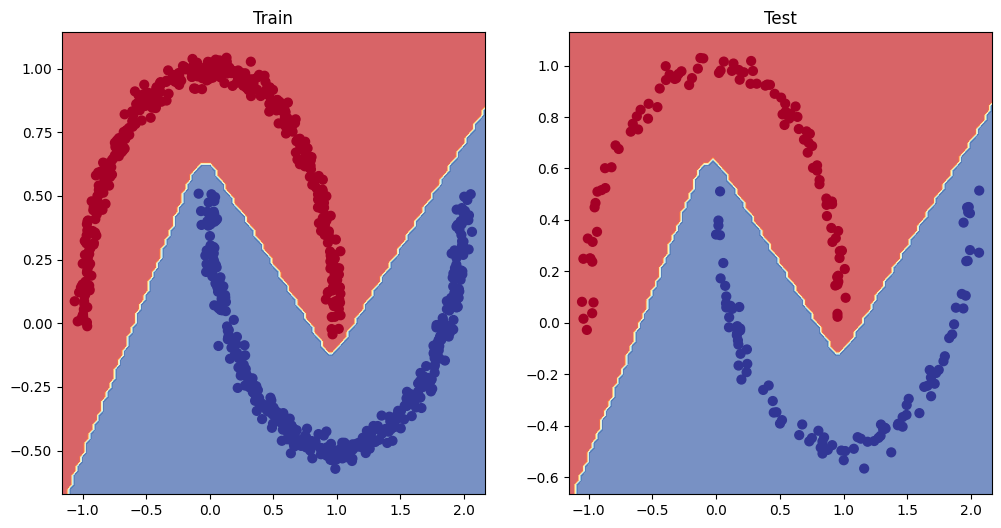

In [212]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, x_moon_train, y_moon_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, x_moon_test, y_moon_test)
plt.show()

In [214]:
# Exercise 6

B = torch.arange(-10,10,1).type(torch.float)

def tanh(x: torch.Tensor)->torch.Tensor:
  return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

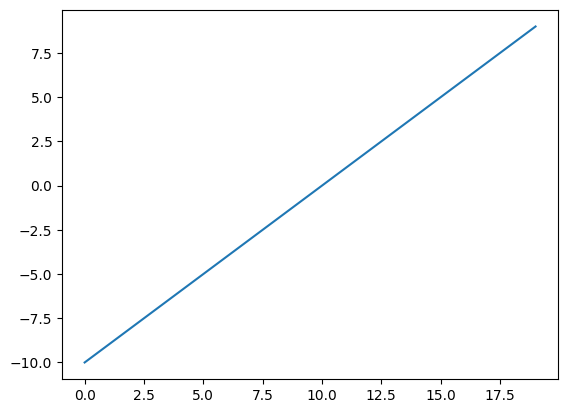

In [215]:
plt.plot(B)
plt.show()

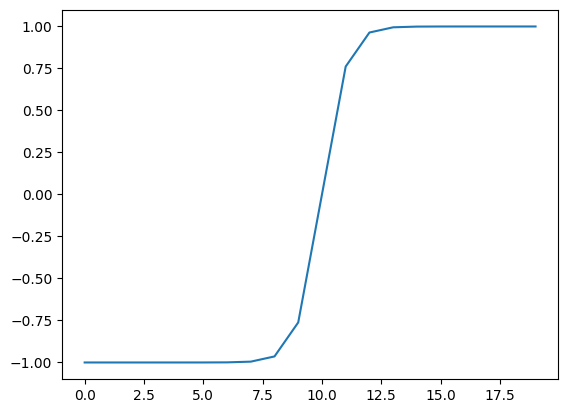

In [216]:
plt.plot(tanh(B))
plt.show()

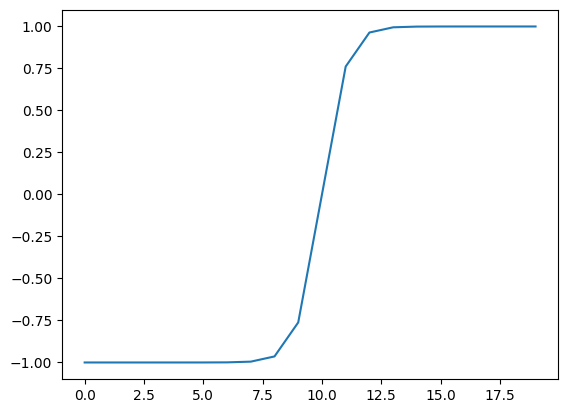

In [218]:
plt.plot(torch.tanh(B))
plt.show()